In [1]:
!date

Wed Jun 18 10:55:55 AM EDT 2025


In [2]:
pwd

'/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code'

In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import ants
from tqdm import tqdm
import warnings

In [4]:
import ants

In [5]:
from nilearn import plotting
from nilearn.glm.first_level import FirstLevelModel

In [6]:
deepcor_dir = '../Data/things/deepcor_outputs/'
analysis_name = 'DeepCor-things-v2'
analysis_dir = os.path.join(deepcor_dir,analysis_name)
analysis_dir

'../Data/things/deepcor_outputs/DeepCor-things-v2'

In [7]:
from matplotlib import pyplot as plt

In [20]:
# ppa = ants.image_read('../Misc/ppa-map.nii.gz')
# im1=ants.image_read(f'../Data/things/GLM/sub-01-preproc-face.nii')
# ppa.resample_image_to_target(im1).to_filename('../Misc/ppa_map_resampled_97_115_97.nii.gz')

In [27]:
ppa = ants.image_read('../Misc/ppa_map_resampled_97_115_97.nii.gz')
ppa.numpy().max()

10.455451

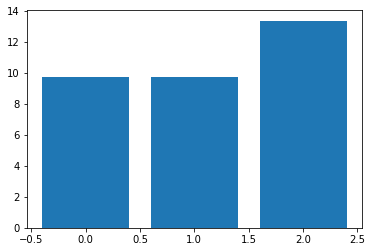

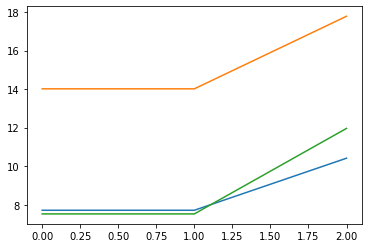

In [29]:
avgs = []
for sub in ['sub-01','sub-02','sub-03']:
    im1=ants.image_read(f'../Data/things/GLM/{sub}-preproc-place.nii')
    im2=ants.image_read(f'../Data/things/GLM/{sub}-compcor-place.nii')
    im3=ants.image_read(f'../Data/things/GLM/{sub}-signal-place.nii')

    ppa_mask = ppa.numpy()>=6
    avg = [im1.numpy()[ppa_mask].mean(),im2.numpy()[ppa_mask].mean(),im3.numpy()[ppa_mask].mean()]
    avgs.append(avg)
    
plt.bar([0,1,2],np.array(avgs).mean(axis=0))

plt.figure()
plt.plot(np.array(avgs)[0,:])
plt.plot(np.array(avgs)[1,:])
plt.plot(np.array(avgs)[2,:])

[[1.1108248, 1.1566193, 2.427215],
 [1.7192092, 1.7156368, 3.3919666],
 [1.4452227, 1.5138501, 3.487341]]

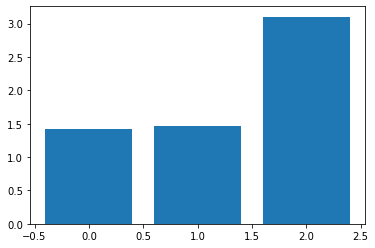

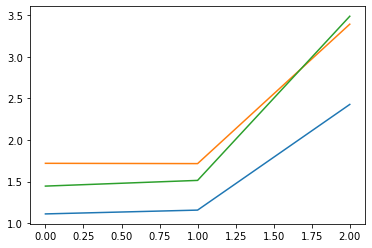

In [36]:
avgs = []
for s in [0,1,2]:
    im1=ants.image_read(f'../Data/things/deepcor_outputs/DeepCor-things-v2/preproc_contrast_place_S{s}_Ravg.nii.gz')
    im2=ants.image_read(f'../Data/things/deepcor_outputs/DeepCor-things-v2/compcor_contrast_place_S{s}_Ravg.nii.gz')
    im3=ants.image_read(f'../Data/things/deepcor_outputs/DeepCor-things-v2/signal_contrast_place_S{s}_Ravg.nii.gz')

    ppa_mask = ppa.numpy()>=6
    avg = [im1.numpy()[ppa_mask].mean(),im2.numpy()[ppa_mask].mean(),im3.numpy()[ppa_mask].mean()]
    avgs.append(avg)
    
plt.bar([0,1,2],np.array(avgs).mean(axis=0))

plt.figure()
plt.plot(np.array(avgs)[0,:])
plt.plot(np.array(avgs)[1,:])
plt.plot(np.array(avgs)[2,:])

avgs

[[0.8144066567393969, 0.7918733816539905, 0.7982926836656845],
 [0.9085884563410361, 0.9012624035691255, 0.7935744034125459],
 [0.8169969318327528, 0.8303323245847767, 0.709261707114183]]

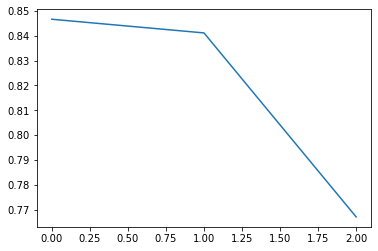

In [42]:
ffa = ants.image_read('../Misc/ppa_map_resampled_97_115_97.nii.gz')
ffa_mask = ffa.numpy()>=6
kind = 'contrast_place'
fn = '../Data/things/deepcor_outputs/DeepCor-things-v2/{method}_{kind}_S{s}_R{r}.nii.gz'

import ants
import numpy as np
rel_arr=[]
for s in [0,1,2]:
    temp=[]
    for method in ['preproc','compcor','signal']:
        #kind = 'contrast_face'
        #kind = 'corr2face'
        fn = '../Data/things/deepcor_outputs/DeepCor-things-v2/{method}_{kind}_S{s}_R{r}.nii.gz'
        #ims = [ants.image_read(fn.format(s=s,r=r,method=method,kind=kind)) for r in [1,2,3]]
        
        ims = [ants.image_read(fn.format(s=s,r=r,method=method,kind=kind)) for r in [1,2,3]]
        arr1 = np.array([im.numpy() for im in ims])
        arr1 = arr1.mean(axis=0)
        arr1[ffa_mask==False]=0
        critval=np.sort(arr1.flatten())[-100]
        arr1[arr1<critval]=0

        ims = [ants.image_read(fn.format(s=s,r=r,method=method,kind=kind)) for r in [4,5,6]]
        arr2 = np.array([im.numpy() for im in ims])
        arr2 = arr2.mean(axis=0)

        rel = np.corrcoef(arr1[arr1>0],arr2[arr1>0])[0,1]
        
        temp.append(rel)
    rel_arr.append(temp)
    
    
plt.plot(np.array(rel_arr).mean(axis=0))    
rel_arr

In [11]:
import ants
import numpy as np

In [35]:
s = 1
for method in ['preproc','compcor','signal']:
    kind = 'contrast_place'
    fn = '../Data/things/deepcor_outputs/DeepCor-things-v2/{method}_{kind}_S{s}_R{r}.nii.gz'
    ofn = '../Data/things/deepcor_outputs/DeepCor-things-v2/{method}_{kind}_S{s}_Ravg.nii.gz'
    ims = [ants.image_read(fn.format(s=s,r=r,method=method,kind=kind)) for r in [1,2,3,4,5,6]]
    avg = np.array([im.numpy() for im in ims]).mean(axis=0)
    ims[0].new_image_like(avg).to_filename(ofn.format(s=s,method=method,kind=kind))